In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

C:\Users\Pehansi Karunaratne\AppData\Local\Temp\ipykernel_19284\4214698320.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
# Loading data
df = pd.read_csv('Datasets/balanced_augmented_NewDepartments_dataset.csv')
print(df.shape)

(420, 2)


In [12]:
df.head(3).T #Display First 3 lines

,0,1,2
Complaints,I have a phone connection also in this number ...,My internet speed is much slower than what I'm...,I need to just make it a high priority because...
Department,Technical,Technical,Technical


In [13]:
pd.DataFrame(df.Department.unique()).values #Get unique values in department column

array([['Technical'],
       ['Billing'],
       ['HR']], dtype=object)

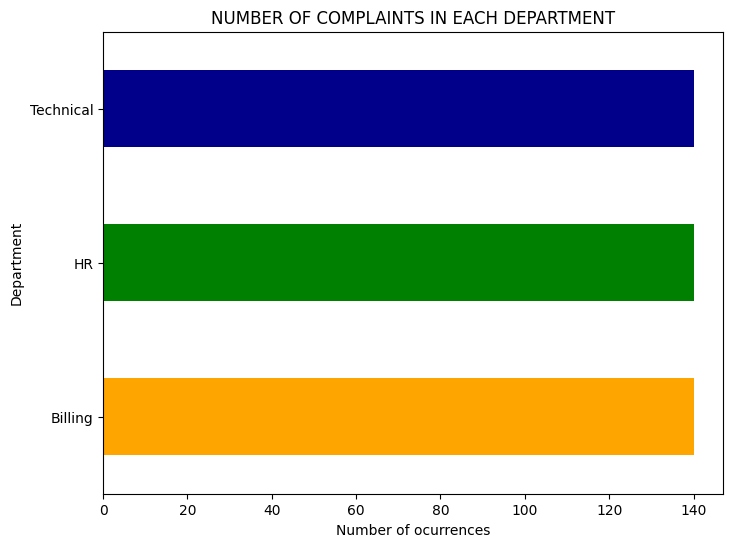

In [14]:
#Plot to see number of complaints in each department
ig = plt.figure(figsize=(8,6))
colors = ['orange','green','darkblue',]
df.groupby('Department').Complaints.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH DEPARTMENT')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [21]:
# Define features and labels
features = df['Complaints']
labels = df['Department']

# TF-IDF vectorization
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features_tfidf = tfidf.fit_transform(features).toarray()

In [22]:
# Model selection without cross-validation
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# Fit the model directly on the entire dataset
model.fit(features_tfidf, labels)

# Calculate accuracy on the entire dataset (you might want to use a separate test set)
accuracy = model.score(features_tfidf, labels)

# Display result without cross-validation
print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")


Model: RandomForestClassifier, Accuracy: 0.8738095238095238


In [29]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=6)
grid_search.fit(features_tfidf, labels)

# Display best parameters and accuracy from grid search
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:  0.9619047619047619


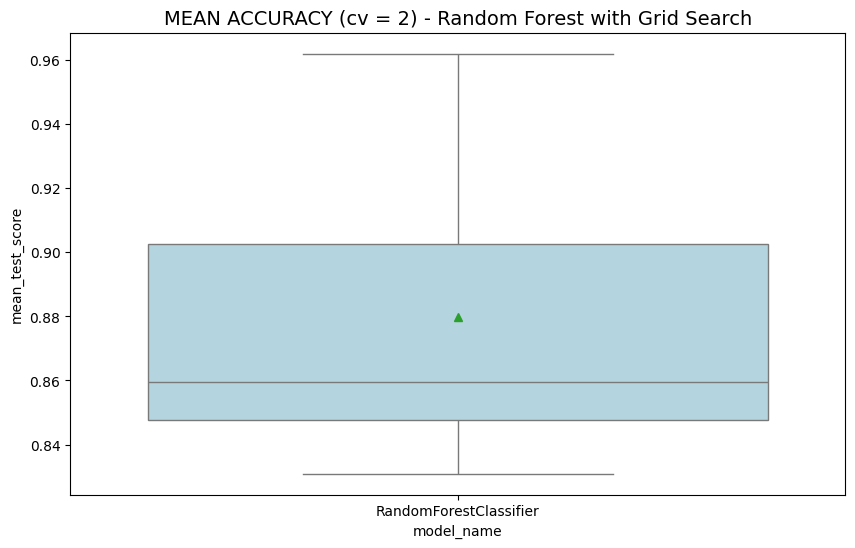

In [30]:
# Plotting
cv_results = grid_search.cv_results_
model_name = model.__class__.__name__
cv_results['model_name'] = model_name

plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='mean_test_score', data=cv_results, color='lightblue', showmeans=True)
plt.title("MEAN ACCURACY (cv = 2) - Random Forest with Grid Search", size=14)
plt.show()

In [31]:
# Train the best model on the entire dataset
best_rf_model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_tfidf, labels, test_size=0.30, random_state=42)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

In [32]:
# Classification report
print('\nCLASSIFICATION METRICS')
print(metrics.classification_report(y_test, y_pred, target_names=df['Department'].unique()))


CLASSIFICATION METRICS
              precision    recall  f1-score   support

   Technical       0.83      0.97      0.90        31
     Billing       0.95      0.95      0.95        44
          HR       0.98      0.88      0.93        51

    accuracy                           0.93       126
   macro avg       0.92      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126



In [35]:
complaint = """I need charges in my bill"""

# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)


print(prediction)


['Billing']


In [36]:
complaint = """One of your agent was so rude to me"""
# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['HR']


In [37]:
complaint = """I was billed for a service i cancelled last year"""
# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['Billing']


In [38]:
complaint = """My data is not working and i can't send messages"""
# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['Technical']


In [39]:
complaint = """Previous agent ignored my call and didn't gave me a proper response"""
# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['HR']


In [40]:
complaint = """There have been consistent discrepancies in the charges reflected on my monthly statements.
Despite selecting a specific plan with clearly defined costs, I have noticed unauthorized fees and unexplained increases in my bills.
This lack of transparency has left me frustrated and confused about the actual charges for the services I am receiving."""
# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['Billing']


In [41]:
complaint = """The customer service agent I spoke to demonstrated
a complete lack of empathy towards my concerns. Instead of actively listening
and understanding the issue, the agent seemed disinterested and indifferent."""

# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['HR']


In [42]:
complaint = """Despite numerous attempts to troubleshoot the problem on my end, including resetting the router, checking for software updates,
and ensuring proper device configurations, the WiFi connection remains unstable and frequently disconnects. This has severely impacted my ability to work,
engage in online meetings, and enjoy a seamless internet experience."""
# Transform the new complaint using the same TF-IDF vectorizer
complaint_tfidf = tfidf.transform([complaint]).toarray()

# Make predictions using the best_rf_model
prediction = best_rf_model.predict(complaint_tfidf)

print(prediction)


['Technical']


In [45]:
# Saving Pickle Files
import pickle
pickle.dump(best_rf_model, open('Models/rf_model.pickle','wb'))
pickle.dump(tfidf, open('Models/dep_vectorizer.pickle','wb'))